In [1]:
import abc
import typing as tp
import collections as cs
import enum as en
import numpy as np
import itertools as it
import more_itertools as mit
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys
import os
import sympy as sp
import scipy as sci
import operator as op
import random as rnd
import copy as cp
import dataclasses as dc
import time

In [5]:
from libs.environment.utils import *
from libs.utils.graph import *
from libs.environment.cost_calculators import *
from libs.solution.initial_solution_creators.heuristic import *
from libs.solution.initial_solution_creators.random import *
from libs.optimizers.algorithms.genetic.operators.mutations import *
from libs.optimizers.algorithms.genetic.operators.crossovers import *
from libs.optimizers.algorithms.genetic.operators.fixers import *
from libs.optimizers.algorithms.genetic.population import Population
from libs.optimizers.algorithms.genetic.population.generators import *
from libs.optimizers.algorithms.genetic.population.parent_selectors import *
from libs.optimizers.algorithms.genetic.population.population_selectors import *
from libs.optimizers.algorithms.genetic.operators.fixers import *

# from bin.experiment0 import genetic_algorithm_tsp_simple_test

In [6]:
coords = coords_random(20, max_x=10, max_y=10)
ax = sns.scatterplot(x=coords.x, y=coords.y)
_ = ax.set_title("Random coordinates")

TypeError: coords_random() missing 1 required positional argument: 'rng'

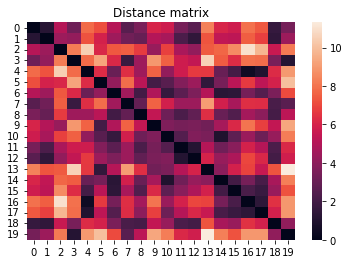

In [4]:
distances = coords_distances(coords, std_dev=0.1)
ax = sns.heatmap(distances)
_ = ax.set_title("Distance matrix")

In [5]:
mean_distance = distances.mean()
print(f"{mean_distance = }")

mean_distance = 4.798140598071158


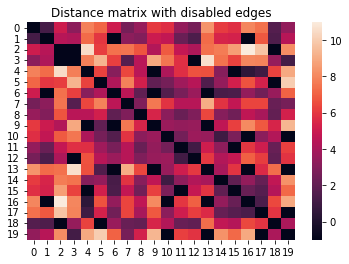

In [6]:
permitted_distances = disable_edges(distances, prohibition_p=0.1)
ax = sns.heatmap(permitted_distances)
_ = ax.set_title("Distance matrix with disabled edges")

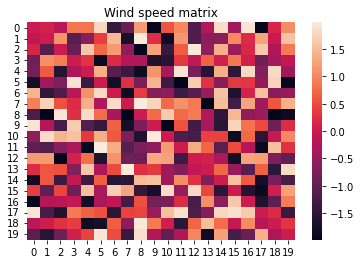

In [7]:
wind = wind_random(permitted_distances, max_velocity=2)
ax = sns.heatmap(wind)
_ = ax.set_title("Wind speed matrix")

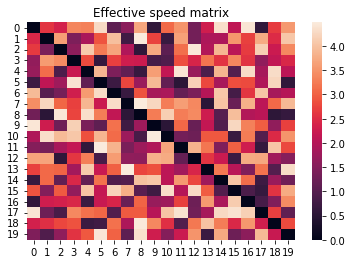

In [8]:
speed = 2.5
eff_speed = effective_speed(speed, wind)
ax = sns.heatmap(eff_speed)
_ = ax.set_title("Effective speed matrix")

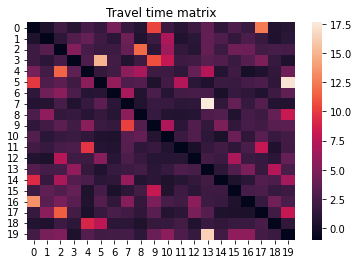

In [9]:
travel_t = travel_times(distances, eff_speed)
ax = sns.heatmap(travel_t)
_ = ax.set_title("Travel time matrix")

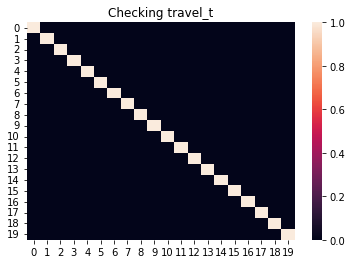

In [11]:
check_travel_t = (travel_t == -1) + 2 * (travel_t == 0)
ax = sns.heatmap(check_travel_t)
_ = ax.set_title("Checking travel_t")

In [10]:
environment = EnvironmentTSPSimple(travel_t)

In [11]:
solution_creator = SolutionCreatorTSPSimpleHeuristicNN()
greedy_solution = solution_creator.create(environment, initial_vx=0)
greedy_solution

SolutionRepresentationTSP(representation=[0, 8, 11, 4, 13, 12, 7, 16, 10, 5, 15, 17, 2, 1, 14, 9, 6, 18, 19, 3])

In [12]:
vxs = list(range(coords.shape[0]))
print(
    f"{len(greedy_solution.representation) = }, success: {set(greedy_solution.representation) == set(vxs)}"
)

len(greedy_solution.representation) = 20, success: True


In [13]:
cost_calculator = TSPCostCalculatorSimple()
total_cost, step_cost = cost_calculator.calculate_total(greedy_solution, environment)
total_cost, step_cost

(14.704770576550509,
 deque([0.5678337143867346,
        0.6573866652242365,
        0.6163839210623999,
        0.29500500914178013,
        0.8402380034334131,
        0.18782646059885555,
        0.5747184564105766,
        1.4840688164694997,
        0.4548711209153218,
        0.6717449750888875,
        1.2141009222073795,
        0.08876899078840716,
        1.4814778379302609,
        1.5087020287501967,
        1.1819800001360146,
        2.586630968849158,
        0.17184279148858422,
        0.03535656043810125,
        0.08583333323069842]))

In [14]:
for i, cost in enumerate(cost_calculator.stepper(greedy_solution, environment)):
    print(f"{i = }, {cost = }")

i = 0, cost = 0.5678337143867346
i = 1, cost = 0.6573866652242365
i = 2, cost = 0.6163839210623999
i = 3, cost = 0.29500500914178013
i = 4, cost = 0.8402380034334131
i = 5, cost = 0.18782646059885555
i = 6, cost = 0.5747184564105766
i = 7, cost = 1.4840688164694997
i = 8, cost = 0.4548711209153218
i = 9, cost = 0.6717449750888875
i = 10, cost = 1.2141009222073795
i = 11, cost = 0.08876899078840716
i = 12, cost = 1.4814778379302609
i = 13, cost = 1.5087020287501967
i = 14, cost = 1.1819800001360146
i = 15, cost = 2.586630968849158
i = 16, cost = 0.17184279148858422
i = 17, cost = 0.03535656043810125
i = 18, cost = 0.08583333323069842


In [15]:
rnd_sol_creator = SolutionCreatorTSPSimpleRandom()
rnd_sol = rnd_sol_creator.create(environment, initial_vx=0)
print(
    f"{len(rnd_sol.representation) = }, success: {set(rnd_sol.representation) == set(vxs)}"
)

len(rnd_sol.representation) = 20, success: True


## Poisson distribution

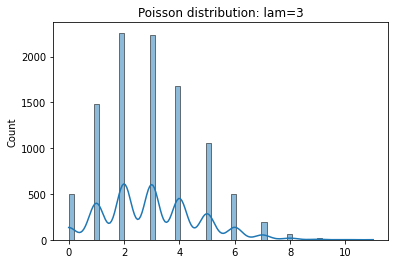

In [16]:
lam = 3
poisson_points = np.random.poisson(lam=lam, size=10000)
ax = sns.histplot(data=poisson_points, kde=True)
_ = ax.set_title(f"Poisson distribution: lam={lam}")

In [17]:
mutator_swap = MutatorHomogenousVectorSwap(probability=1, lam=1)
mutator_shuffle = MutatorHomogenousVectorShuffle(probability=1, lam=1)
chromosome = ChromosomeHomogenousVector(greedy_solution.representation)

In [18]:
mutated, _ = mutator_swap.mutate(chromosome)
print(f"{chromosome.sequence = }\n{mutated.sequence    = }")

chromosome.sequence = [0, 8, 11, 4, 13, 12, 7, 16, 10, 5, 15, 17, 2, 1, 14, 9, 6, 18, 19, 3]
mutated.sequence    = [0, 8, 3, 4, 13, 12, 7, 14, 10, 5, 9, 17, 15, 1, 16, 6, 2, 18, 19, 11]


In [19]:
mutated, _ = mutator_shuffle.mutate(chromosome)
print(f"{chromosome.sequence = }\n{mutated.sequence    = }")

chromosome.sequence = [0, 8, 11, 4, 13, 12, 7, 16, 10, 5, 15, 17, 2, 1, 14, 9, 6, 18, 19, 3]
mutated.sequence    = [11, 4, 13, 12, 7, 16, 10, 5, 15, 17, 2, 1, 14, 9, 6, 18, 19, 3, 0, 8]


In [20]:
for i in range(10):
    if i > 10:
        break
else:
    print("makapaka")

makapaka


In [21]:
print(f"success: {set(chromosome.sequence) == set(mutated.sequence)}")

success: True


In [22]:
crossover_normal = CrossoverHomogenousVector()
crossover_kpoint = CrossoverHomogenousVectorKPoint()
crossover_kpoint_random = CrossoverHomogenousVectorKPointPoisson(lam=0.5)

In [23]:
chromosome1 = ChromosomeHomogenousVector(greedy_solution.representation)
chromosome2 = ChromosomeHomogenousVector(rnd_sol.representation)

In [24]:
new_generation_normal = crossover_normal.execute(chromosome1, chromosome2)
new_generation_kpoint = crossover_kpoint.execute(chromosome1, chromosome2, k=3)
new_generation_kpoint_random = crossover_kpoint_random.execute(chromosome1, chromosome2)

In [25]:
print(
    f"parents:\n\t{chromosome1.sequence} (len: {len(chromosome1.sequence)})\n\t{chromosome2.sequence} (len: {len(chromosome2.sequence)})"
)
print(
    f"normal:\n\t{new_generation_normal[0].sequence} (len: {len(new_generation_normal[0].sequence)})\n\t{new_generation_normal[1].sequence} (len: {len(new_generation_normal[1].sequence)})"
)
print(
    f"k-point:\n\t{new_generation_kpoint[0].sequence} (len: {len(new_generation_kpoint[0].sequence)})\n\t{new_generation_kpoint[1].sequence} (len: {len(new_generation_kpoint[1].sequence)})"
)

parents:
	[0, 8, 11, 4, 13, 12, 7, 16, 10, 5, 15, 17, 2, 1, 14, 9, 6, 18, 19, 3] (len: 20)
	[0, 12, 7, 9, 5, 13, 2, 1, 6, 14, 15, 17, 4, 16, 11, 3, 8, 18, 10, 19] (len: 20)
normal:
	[18, 19, 3, 0, 12, 7, 9, 5, 13, 2, 1, 6, 14, 15, 17, 4, 16, 11, 3, 8] (len: 20)
	[18, 10, 19, 0, 8, 11, 4, 13, 12, 7, 16, 10, 5, 15, 17, 2, 1, 14, 9, 6] (len: 20)
k-point:
	[0, 8, 11, 4, 13, 13, 2, 16, 10, 5, 15, 17, 4, 16, 11, 3, 8, 18, 10, 19] (len: 20)
	[0, 12, 7, 9, 5, 12, 7, 1, 6, 14, 15, 17, 2, 1, 14, 9, 6, 18, 19, 3] (len: 20)


Note - Crossover is useless for TSP and other problems, where values can not repeat themselves.

In [26]:
bad_chromosome = cp.deepcopy(chromosome1)
bad_chromosome.sequence[2:6] = bad_chromosome.sequence[7:11]

In [27]:
fixer = ChromosomeFixerTSPSimple()

In [28]:
fixed_chromosome, should_die = fixer.fix(bad_chromosome, environment)
should_die, fixed_chromosome

(FixResult(fix_status=<FixStatus.SUCCESS: 1>, no_of_errors=0),
 ChromosomeHomogenousVector(sequence=[0, 8, 16, 10, 5, 15, 7, 12, 11, 4, 13, 17, 2, 1, 14, 9, 6, 18, 19, 3]))

In [29]:
print(f"success: {set(fixed_chromosome.sequence) == set(vxs)}")

success: True


## New population generation

In [30]:
POPULATION_SIZE = 10
solution_creator_heuristic = SolutionCreatorTSPSimpleHeuristicNN()
solution_creator_random = SolutionCreatorTSPSimpleRandom()
heuristic_solution = solution_creator.create(environment, initial_vx=0)
random_solutions = [
    solution_creator_random.create(environment, initial_vx=0)
    for _ in range(POPULATION_SIZE - 1)
]

In [31]:
population: Population = [
    ChromosomeHomogenousVector(sol.representation)
    for sol in mit.value_chain(heuristic_solution, random_solutions)
]
population

[ChromosomeHomogenousVector(sequence=[0, 8, 11, 4, 13, 12, 7, 16, 10, 5, 15, 17, 2, 1, 14, 9, 6, 18, 19, 3]),
 ChromosomeHomogenousVector(sequence=[0, 10, 4, 14, 9, 16, 1, 13, 8, 5, 19, 15, 12, 11, 17, 18, 2, 7, 6, 3]),
 ChromosomeHomogenousVector(sequence=[0, 6, 14, 18, 16, 8, 17, 19, 15, 12, 4, 11, 10, 9, 1, 5, 3, 7, 2, 13]),
 ChromosomeHomogenousVector(sequence=[0, 17, 1, 14, 15, 2, 4, 6, 16, 13, 19, 9, 3, 7, 5, 8, 10, 18, 11, 12]),
 ChromosomeHomogenousVector(sequence=[0, 6, 13, 10, 1, 17, 4, 3, 7, 16, 2, 12, 14, 11, 19, 9, 15, 18, 5, 8]),
 ChromosomeHomogenousVector(sequence=[0, 3, 15, 14, 6, 1, 5, 11, 16, 18, 17, 19, 9, 10, 4, 13, 12, 2, 7, 8]),
 ChromosomeHomogenousVector(sequence=[0, 15, 12, 8, 4, 14, 7, 3, 9, 1, 13, 19, 6, 10, 11, 2, 16, 5, 17, 18]),
 ChromosomeHomogenousVector(sequence=[0, 8, 2, 17, 16, 3, 9, 7, 18, 12, 4, 1, 13, 11, 15, 14, 10, 19, 6, 5]),
 ChromosomeHomogenousVector(sequence=[0, 15, 6, 9, 19, 2, 7, 5, 17, 18, 12, 13, 3, 10, 14, 16, 4, 11, 1, 8]),
 Chromosom

In [32]:
cost_calculator = TSPCostCalculatorSimple()
parent_selector = ParentSelectorElitistRandomized()
population_selector = PopulationSelectorProbabilistic()
mutators = [
    MutatorHomogenousVectorSwap(probability=0.1, lam=0.5),
    MutatorHomogenousVectorShuffle(probability=0.1, lam=0.5),
]
crossover = CrossoverHomogenousVectorKPointPoisson(lam=0.5)
fixer = ChromosomeFixerTSPSimple()
generation_generator = PopulationGenerator()

max_cost = max(filter(lambda x: x > 0 and math.isfinite(x), np.nditer(environment.cost)))  # type: ignore
mean_cost = np.mean(
    [x for x in np.nditer(environment.cost) if x > 0 and math.isfinite(x)]
)

invalidity_weight = 0.2 * mean_cost
error_weight = 0.05 * mean_cost
cost_weight = 1

In [33]:
next_generation, population_generation_data = generation_generator.generate(
    population,
    environment,
    cost_calculator,
    parent_selector,
    mutators,
    crossover,
    fixer,
    population_selector,
    invalidity_weight,
    error_weight,
    cost_weight,
)
next_generation

[ChromosomeHomogenousVector(sequence=[0, 6, 14, 18, 16, 8, 17, 19, 15, 12, 4, 11, 10, 9, 1, 5, 2, 3, 7, 13]),
 ChromosomeHomogenousVector(sequence=[0, 17, 1, 14, 15, 2, 4, 6, 16, 13, 19, 9, 3, 7, 5, 8, 10, 18, 11, 12]),
 ChromosomeHomogenousVector(sequence=[0, 15, 12, 8, 4, 14, 7, 3, 9, 1, 13, 19, 6, 10, 11, 2, 16, 5, 17, 18]),
 ChromosomeHomogenousVector(sequence=[0, 6, 14, 18, 16, 8, 17, 19, 15, 12, 4, 11, 10, 9, 1, 5, 3, 7, 2, 13]),
 ChromosomeHomogenousVector(sequence=[0, 6, 13, 10, 1, 17, 4, 3, 7, 16, 2, 12, 14, 11, 19, 18, 15, 8, 5, 9]),
 ChromosomeHomogenousVector(sequence=[0, 15, 6, 9, 19, 2, 7, 5, 17, 18, 12, 13, 3, 10, 14, 16, 4, 11, 1, 8]),
 ChromosomeHomogenousVector(sequence=[0, 15, 6, 9, 19, 2, 7, 5, 17, 18, 12, 13, 3, 10, 14, 16, 8, 11, 4, 1]),
 ChromosomeHomogenousVector(sequence=[0, 10, 4, 14, 9, 16, 1, 13, 8, 5, 19, 15, 12, 11, 17, 18, 2, 7, 6, 3]),
 ChromosomeHomogenousVector(sequence=[0, 6, 13, 10, 1, 17, 4, 3, 7, 16, 2, 12, 14, 11, 19, 9, 15, 18, 5, 8]),
 Chromosom

## Genetic algorithm

In [34]:
class GeneticAlgorithmFinishReason(en.Enum):
    MAX_ITERATIONS = en.auto()
    MAX_ITERATIONS_NO_UPDATE = en.auto()
    TIMEOUT = en.auto()


@dc.dataclass
class GeneticAlgorithmExecutionData:
    best_chromosome: Chromosome
    best_cost: CostT
    initial_population: Population
    initial_best_cost: CostT
    end_population: Population
    iteration_best_costs: list[CostT]
    execution_time: float
    finish_reason: GeneticAlgorithmFinishReason
    last_iteration_n: int


def genetic_algorithm_tsp_simple_test(
    max_iterations: int,
    max_iterations_no_update: int,
    timeout: float,
    swap_p: float,
    swap_lam: float,
    shuffle_p: float,
    shuffle_lam: float,
    crossover_lam: float,
    invalidity_weight: float,
    error_weight: float,
    cost_weight: float,
) -> GeneticAlgorithmExecutionData:
    t0 = time.time()

    POPULATION_SIZE = 10
    solution_creator_heuristic = SolutionCreatorTSPSimpleHeuristicNN()
    solution_creator_random = SolutionCreatorTSPSimpleRandom()
    heuristic_solution = solution_creator_heuristic.create(environment, initial_vx=0)
    random_solutions = [
        solution_creator_random.create(environment, initial_vx=0)
        for _ in range(POPULATION_SIZE - 1)
    ]

    initial_population: Population = [
        ChromosomeHomogenousVector(sol.representation)
        for sol in mit.value_chain(heuristic_solution, random_solutions)
    ]

    cost_calculator = TSPCostCalculatorSimple()
    parent_selector = ParentSelectorElitistRandomized()
    population_selector = PopulationSelectorProbabilistic()
    mutators = [
        MutatorHomogenousVectorSwap(probability=swap_p, lam=swap_lam),
        MutatorHomogenousVectorShuffle(probability=shuffle_p, lam=shuffle_lam),
    ]
    crossover = CrossoverHomogenousVectorKPointPoisson(lam=crossover_lam)
    fixer = ChromosomeFixerTSPSimple()
    generation_generator = PopulationGenerator()

    current_population = cp.copy(initial_population)

    initial_best_chromosome = initial_population[0]

    initial_best_cost, _ = cost_calculator.calculate_total(
        SolutionRepresentationTSP(initial_best_chromosome.sequence), environment
    )

    for chromosome in initial_population[1:]:
        current_cost, _ = cost_calculator.calculate_total(
            SolutionRepresentationTSP(chromosome.sequence), environment
        )

        if current_cost < initial_best_cost:
            initial_best_chromosome = chromosome
            initial_best_cost = current_cost

    iteration_since_last_update = 0
    NaN = float("NaN")
    iteration_best_costs: list[CostT] = [NaN for _ in range(max_iterations)]
    best_chromosome = cp.deepcopy(initial_best_chromosome)
    best_cost = initial_best_cost

    for i in range(max_iterations):
        delta_t = time.time() - t0

        if (reason_timeout := (delta_t > timeout)) or (
            reason_iterations := (
                iteration_since_last_update > max_iterations_no_update
            )
        ):
            reason = (
                GeneticAlgorithmFinishReason.TIMEOUT
                if reason_timeout
                else GeneticAlgorithmFinishReason.MAX_ITERATIONS_NO_UPDATE
            )

            return GeneticAlgorithmExecutionData(
                best_chromosome,
                best_cost,
                initial_population,
                initial_best_cost,
                end_population=current_population,
                iteration_best_costs=iteration_best_costs,
                execution_time=delta_t,
                finish_reason=reason,
                last_iteration_n=i,
            )

        current_population, population_generation_data = generation_generator.generate(
            current_population,
            environment,
            cost_calculator,
            parent_selector,
            mutators,
            crossover,
            fixer,
            population_selector,
            invalidity_weight,
            error_weight,
            cost_weight,
        )

        costs = population_generation_data["new_costs"]

        current_best_chromosome = next_generation[0]
        current_best_cost = costs[0]

        for chromosome, cost in zip(next_generation[1:], costs[1:]):
            if cost < current_best_cost:
                current_best_chromosome = chromosome
                current_best_cost = cost

        iteration_best_costs[i] = current_best_cost

        if current_best_cost < best_cost:
            best_chromosome = current_best_chromosome
            best_cost = current_best_cost
            iteration_since_last_update = 0
        else:
            iteration_since_last_update += 1

    return GeneticAlgorithmExecutionData(
        best_chromosome,
        best_cost,
        initial_population,
        initial_best_cost,
        end_population=current_population,
        iteration_best_costs=iteration_best_costs,
        execution_time=time.time() - t0,
        finish_reason=GeneticAlgorithmFinishReason.MAX_ITERATIONS,
        last_iteration_n=max_iterations - 1,
    )

In [35]:
max_cost = max(filter(lambda x: x > 0 and math.isfinite(x), np.nditer(environment.cost)))  # type: ignore
mean_cost = np.mean(
    [x for x in np.nditer(environment.cost) if x > 0 and math.isfinite(x)]
)

invalidity_weight = 0.2 * mean_cost
error_weight = 0.05 * mean_cost
cost_weight = 1

result = genetic_algorithm_tsp_simple_test(
    max_iterations=1000,
    max_iterations_no_update=100,
    timeout=60,
    swap_p=0.05,
    swap_lam=1,
    shuffle_p=0.05,
    shuffle_lam=1,
    crossover_lam=1,
    invalidity_weight=invalidity_weight,
    error_weight=error_weight,
    cost_weight=cost_weight,
)

print(
    (
        f"{result.finish_reason     = }\n"
        f"{result.execution_time    = }\n"
        f"{result.last_iteration_n  = }\n"
        f"{result.initial_best_cost = }\n"
        f"{result.best_cost         = }"
    )
)

result.finish_reason     = <GeneticAlgorithmFinishReason.TIMEOUT: 3>
result.execution_time    = 68.1552734375
result.last_iteration_n  = 15
result.initial_best_cost = 14.704770576550509
result.best_cost         = 14.704770576550509


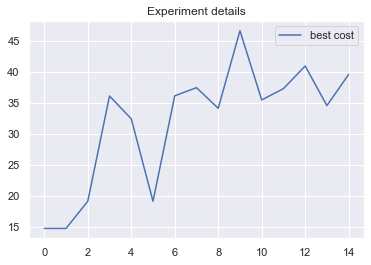

In [36]:
data = pd.DataFrame(
    data=result.iteration_best_costs,
    columns=["best cost"],
    # index=[("iteration", i) for i in range(len(result.iteration_best_costs))]
)
sns.set_theme()
ax = sns.lineplot(data=data)
_ = ax.set_title("Experiment details")

## experiment0

In [37]:
print("initializing environment")

coords = coords_random(5, max_x=10, max_y=10)
distances = coords_distances(coords, std_dev=0.1)
permitted_distances = disable_edges(distances, prohibition_p=0.1)
wind = wind_random(permitted_distances, max_velocity=1)
speed = 2.5
eff_speed = effective_speed(speed, wind)
travel_t = travel_times(distances, eff_speed)
environment = EnvironmentTSPSimple(travel_t)

solution_creator_heuristic = SolutionCreatorTSPSimpleHeuristicNN()
heuristic_solution = solution_creator_heuristic.create(environment, initial_vx=0)
cost_calculator = TSPCostCalculatorSimple()
heuristic_cost = cost_calculator.calculate_total(heuristic_solution, environment)

max_cost = max(filter(lambda x: x > 0 and math.isfinite(x), np.nditer(environment.cost)))  # type: ignore
mean_cost = np.mean(
    [x for x in np.nditer(environment.cost) if x > 0 and math.isfinite(x)]
)

invalidity_weight = 0.2 * mean_cost
error_weight = 0.05 * mean_cost
cost_weight = 1

print("calling the algorithm")

initializing environment
calling the algorithm


In [38]:
?plt.savefig

Signature: plt.savefig(*args, **kwargs)
Docstring:
Save the current figure.

Call signature::

  savefig(fname, dpi=None, facecolor='w', edgecolor='w',
          orientation='portrait', papertype=None, format=None,
          transparent=False, bbox_inches=None, pad_inches=0.1,
          frameon=None, metadata=None)

The available output formats depend on the backend being used.

Parameters
----------
fname : str or path-like or binary file-like
    A path, or a Python file-like object, or
    possibly some backend-dependent object such as
    `matplotlib.backends.backend_pdf.PdfPages`.

    If *format* is set, it determines the output format, and the file
    is saved as *fname*.  Note that *fname* is used verbatim, and there
    is no attempt to make the extension, if any, of *fname* match
    *format*, and no extension is appended.

    If *format* is not set, then the format is inferred from the
    extension of *fname*, if there is one.  If *format* is not
    set and *fname* has n

## MTSP development - matrix

In [12]:
SALESMAN_N = 4
VERTICES_N = 8
MAX_CHROMOSOME_LEN = VERTICES_N

vertices = list(range(VERTICES_N))
mx_height, mx_width = SALESMAN_N, MAX_CHROMOSOME_LEN

all_ixs = list(it.product(range(SALESMAN_N), range(MAX_CHROMOSOME_LEN)))
coord_ixs = np.random.choice(len(all_ixs), size=len(vertices), replace=False)
vertex_ixs = tuple(np.array(list(all_ixs[i] for i in coord_ixs)).T.tolist())
dbg_xys = [(x, y) for x, y in zip(vertex_ixs[0], vertex_ixs[1])]
print(f"xys: {dbg_xys}({len(dbg_xys)})")

mx = -np.ones(shape=(mx_height, mx_width), dtype=np.float64)
mx[vertex_ixs] = vertices
sum(1 for x in np.nditer(mx) if x != -1) == VERTICES_N

xys: [(1, 4), (2, 4), (3, 7), (0, 6), (2, 6), (2, 5), (0, 3), (2, 0)](8)


True

In [13]:
mx, set(vertices) - set(float(x) for x in np.nditer(mx))

(array([[-1., -1., -1.,  6., -1., -1.,  3., -1.],
        [-1., -1., -1., -1.,  0., -1., -1., -1.],
        [ 7., -1., -1., -1.,  1.,  5.,  4., -1.],
        [-1., -1., -1., -1., -1., -1., -1.,  2.]]),
 set())

In [14]:
def swap_random_matrix_vxs
# TODO maybe two functions - to draw indices of vertices to swap and to actually swap

SyntaxError: invalid syntax (Temp/ipykernel_20960/1887764639.py, line 1)

In [15]:
T1 = tp.TypeVar("T1")
T2 = tp.TypeVar("T2")
T3 = tp.TypeVar("T3")


def rand_fill_to_n(
    seq: tp.Sequence[T1],
    fill_val: T2,
    n: int,
) -> list[Union[T1, T2]]:
    """
    Assumes that `n >= len(c1)`
    """

    seq_len = len(seq)
    diff = n - seq_len

    if diff < 0:
        raise ValueError(
            "`n` has to be greater than `len(seq)`", {"n": n, "seq_len": seq_len}
        )

    if diff == 0:
        return list(seq)

    filler_ixs = sorted(np.random.choice(seq_len, size=diff))
    shorter_chunk_ixs = mit.windowed(mit.value_chain(0, filler_ixs, n), n=2)

    return list(
        it.chain.from_iterable(
            mit.intersperse(  # type: ignore
                [fill_val], (seq[i:j] for i, j in shorter_chunk_ixs)
            )
        )
    )


def rand_fill_shorter(
    c1: tp.Sequence[T1], c2: tp.Sequence[T2], fill_val: T3
) -> tuple[tp.Sequence[Union[T1, T2, T3]], tp.Sequence[Union[T1, T2, T3]]]:
    c1_len = len(c1)
    c2_len = len(c2)
    shorter, longer, shorter_len, longer_len = (
        (c1, c2, c1_len, c2_len) if c1_len < c2_len else (c2, c1, c2_len, c1_len)
    )

    filled_shorter = rand_fill_to_n(shorter, fill_val, n=longer_len)  # type: ignore

    return filled_shorter, longer  # type: ignore

In [16]:
c1, c2 = rand_fill_shorter(list(range(10)), list(range(6)), -1)
len(c1) == len(c2)

True

In [17]:
foo = np.arange(12).reshape((2, 6))
for row in foo:
    print(row[row % 2 == 0])

[0 2 4]
[ 6  8 10]


In [18]:
def shorten_filled(mx: np.ndarray, fill_val) -> np.ndarray:
    """
    Reduces max row size to size of a row with the greatest number
    of non-`fill_val` values.
    """

    not_fill_vals = mx != fill_val
    print(f"{not_fill_vals = }")
    reduced_row_len = max(len(row[row == True]) for row in not_fill_vals)
    print(f"{reduced_row_len = }")

    return np.array(
        [rand_fill_to_n(row[row != fill_val], fill_val, reduced_row_len) for row in mx]
    )


shorten_filled(mx, fill_val=(-1))

not_fill_vals = array([[False, False, False,  True, False, False,  True, False],
       [False, False, False, False,  True, False, False, False],
       [ True, False, False, False,  True,  True,  True, False],
       [False, False, False, False, False, False, False,  True]])
reduced_row_len = 4


array([[-1.,  6., -1.,  3.],
       [-1., -1., -1.,  0.],
       [ 7.,  1.,  5.,  4.],
       [-1., -1., -1.,  2.]])

In [19]:
def spy_iter(coll):
    for i, elem in enumerate(coll):
        print(f"coll[{i}] = {elem}")
    return coll

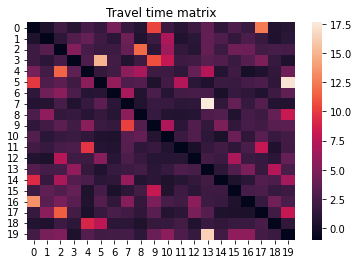

In [20]:
ax = sns.heatmap(travel_t)
_ = ax.set_title("Travel time matrix")

In [50]:
def extend_cost_mx(mx: np.ndarray, copy_n: int, to_copy_ix: int) -> np.ndarray:
    """
    Extends `mx` by copying `to_copy_ix`'th row and column `copy_n` times.
    """

    n_columns = np.repeat(np.array([mx[:, to_copy_ix]]).T, copy_n, axis=1)
    n_rows = np.repeat(np.array([mx[to_copy_ix, :]]).T, copy_n, axis=1).T
    copy_to_copy_costs = np.full(shape=(copy_n, copy_n), fill_value=mx[0, 0])

    # fmt: off
    return np.block([
        [copy_to_copy_costs, n_rows],
        [n_columns,          mx    ]
    ])
    # fmt: on

In [51]:
np.repeat(np.array([[1, 2, 3]]).T, 2, axis=1).T

array([[1, 2, 3],
       [1, 2, 3]])

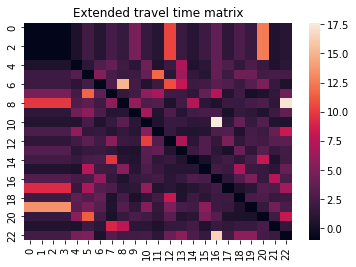

In [52]:
extended_travel_t = extend_cost_mx(travel_t, copy_n=3, to_copy_ix=0)
ax = sns.heatmap(extended_travel_t)
_ = ax.set_title("Extended travel time matrix")

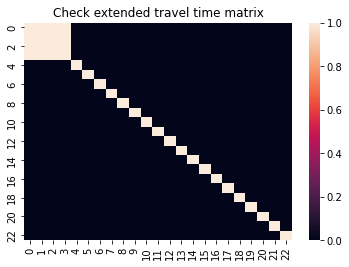

In [53]:
check_extended_travel_t = extended_travel_t == -1
ax = sns.heatmap(check_extended_travel_t)
_ = ax.set_title("Check extended travel time matrix")

In [58]:
initial_sol = [0] + [
    list(range(1, 10))[i] for i in np.random.choice(9, size=9, replace=False)
]
initial_sol

[0, 3, 7, 2, 5, 6, 8, 9, 1, 4]

In [ ]:
def list_from_seed_list(seed: list[int]) -> list[int]:
    """
    Swaps
    """

In [70]:
rng1 = np.random.default_rng()
print(rng1.integers(10))
rng2 = np.random.default_rng()
print(rng2.integers(10))

0
2


In [81]:
def create_tsp_solution_random(
    cost_mx: np.ndarray, initial_vx: int, rng: np.random.Generator
):
    vx_n = cost_mx.shape[0]
    solution_tail = list(set(range(vx_n)) - {initial_vx})
    rng.shuffle(solution_tail)
    return [initial_vx] + solution_tail


create_tsp_solution_random(np.arange(9).reshape((3, 3)), 0, rng1)

[0, 1, 2]

In [1]:
from libs.schemas import ExperimentTSPSchema

In [2]:
schema = ExperimentTSPSchema()
config = {"maka_from_path": "data/dummy_data.yaml", "dummy_enum": "A"}
schema.load(config).maka_from_path

in pre load: data = {'maka_from_path': 'data/dummy_data.yaml', 'dummy_enum': 'A'}
checked numeric
checked enums
loaded paths
loaded registers
parsing paths
converting or not: field.name = 'maka_from_path', field.type = <class 'str'>, {'is_path': True}
converting or not: field.name = 'dummy_enum', field.type = <enum 'DummyEnum'>, {}


WindowsPath('data/dummy_data.yaml')